In [1]:
%%time
import malaya

CPU times: user 5.1 s, sys: 1.3 s, total: 6.4 s
Wall time: 7.82 s


## Describe supported dependencies

In [2]:
malaya.dependency.describe()

acl - clausal modifier of noun
advcl - adverbial clause modifier
advmod - adverbial modifier
amod - adjectival modifier
appos - appositional modifier
aux - auxiliary
case - case marking
ccomp - clausal complement
compound - compound
compound:plur - plural compound
conj - conjunct
cop - cop
csubj - clausal subject
dep - dependent
det - determiner
fixed - multi-word expression
flat - name
iobj - indirect object
mark - marker
nmod - nominal modifier
nsubj - nominal subject
obj - direct object
parataxis - parataxis
root - root
xcomp - open clausal complement
you can read more from https://universaldependencies.org/treebanks/id_pud/index.html


In [3]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

## List available transformer Dependency models

In [4]:
malaya.dependency.available_transformer_model()

{'bert': ['426.0 MB',
  'arc accuracy: 0.855',
  'types accuracy: 0.848',
  'root accuracy: 0.920'],
 'tiny-bert': ['59.5 MB',
  'arc accuracy: 0.718',
  'types accuracy: 0.694',
  'root accuracy: 0.886'],
 'albert': ['50.0 MB',
  'arc accuracy: 0.811',
  'types accuracy: 0.793',
  'root accuracy: 0.879'],
 'tiny-albert': ['24.8 MB',
  'arc accuracy: 0.708',
  'types accuracy: 0.673',
  'root accuracy: 0.817'],
 'xlnet': ['450.2 MB',
  'arc accuracy: 0.931',
  'types accuracy: 0.925',
  'root accuracy: 0.947'],
 'alxlnet': ['50.0 MB',
  'arc accuracy: 0.894',
  'types accuracy: 0.886',
  'root accuracy: 0.942']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#dependency-parsing

**The best model in term of accuracy is XLNET**.

## Load xlnet dependency model

In [5]:
model = malaya.dependency.transformer(model = 'xlnet')

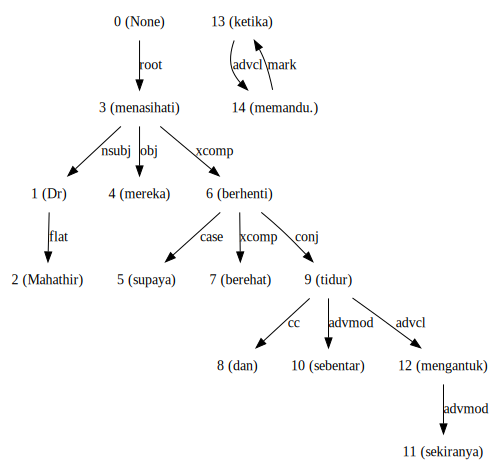

In [6]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

## Voting stack model

downloading frozen /Users/huseinzolkepli/Malaya/dependency/alxlnet/base model


51.0MB [00:50, 1.01MB/s]                          


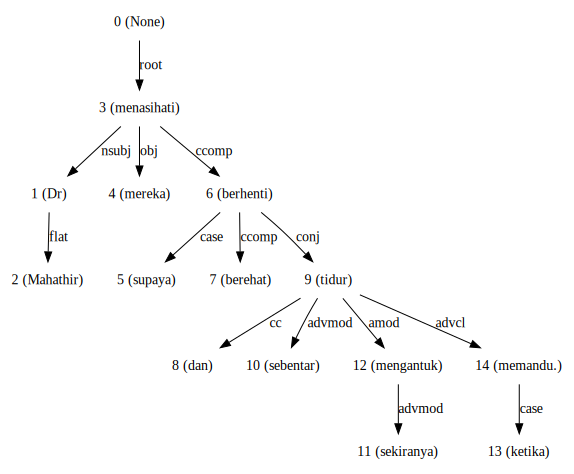

In [8]:
alxlnet = malaya.dependency.transformer(model = 'alxlnet')
tagging, indexing = malaya.stack.voting_stack([model, alxlnet, model], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

## Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [9]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

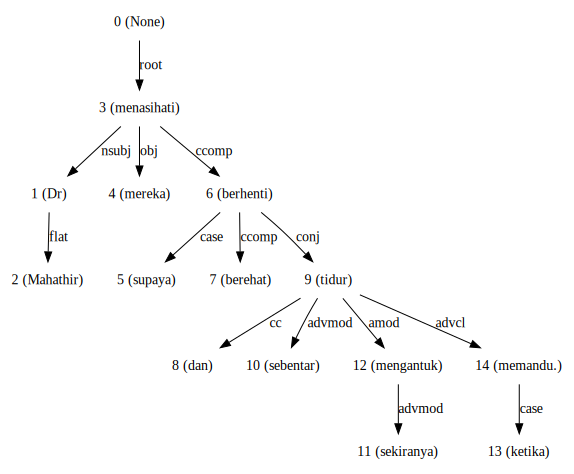

In [10]:
graph.to_graphvis()

#### Get nodes

In [11]:
graph.nodes

defaultdict(<function malaya.function.parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [3]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Dr',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 3,
              'deps': defaultdict(list, {'flat': [2]}),
              'rel': 'nsubj'},
             3: {'address': 3,
              'word': 'menasihati',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'nsubj': [1], 'obj': [4], 'ccomp': [6]}),
              'rel': '

#### Flat the graph

In [12]:
list(graph.triples())

[(('menasihati', '_'), 'nsubj', ('Dr', '_')),
 (('Dr', '_'), 'flat', ('Mahathir', '_')),
 (('menasihati', '_'), 'obj', ('mereka', '_')),
 (('menasihati', '_'), 'ccomp', ('berhenti', '_')),
 (('berhenti', '_'), 'case', ('supaya', '_')),
 (('berhenti', '_'), 'ccomp', ('berehat', '_')),
 (('berhenti', '_'), 'conj', ('tidur', '_')),
 (('tidur', '_'), 'cc', ('dan', '_')),
 (('tidur', '_'), 'advmod', ('sebentar', '_')),
 (('tidur', '_'), 'amod', ('mengantuk', '_')),
 (('mengantuk', '_'), 'advmod', ('sekiranya', '_')),
 (('tidur', '_'), 'advcl', ('memandu.', '_')),
 (('memandu.', '_'), 'case', ('ketika', '_'))]

#### Check the graph contains cycles

In [13]:
graph.contains_cycle()

False

#### Generate networkx

Make sure you already installed networkx, `pip install networkx`

In [14]:
digraph = graph.to_networkx()
digraph

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(digraph)
plt.show()

<Figure size 640x480 with 1 Axes>

In [16]:
digraph.edges()

OutMultiEdgeDataView([(1, 3), (2, 1), (4, 3), (5, 6), (6, 3), (7, 6), (8, 9), (9, 6), (10, 9), (11, 12), (12, 9), (13, 14), (14, 9)])

In [17]:
digraph.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [18]:
labels = {i:graph.get_by_address(i)['word'] for i in digraph.nodes()}
labels

{1: 'Dr',
 2: 'Mahathir',
 3: 'menasihati',
 4: 'mereka',
 5: 'supaya',
 6: 'berhenti',
 7: 'berehat',
 8: 'dan',
 9: 'tidur',
 10: 'sebentar',
 11: 'sekiranya',
 12: 'mengantuk',
 13: 'ketika',
 14: 'memandu.'}

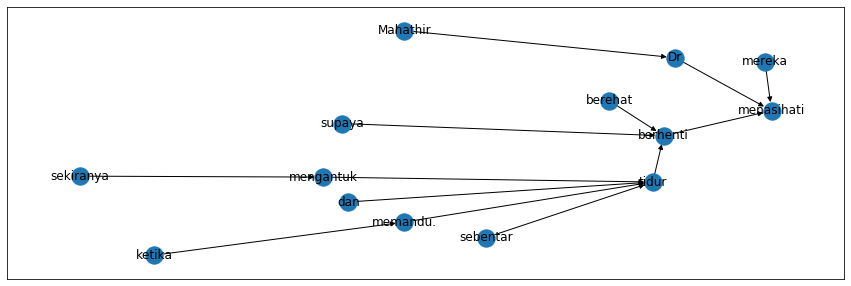

In [19]:
plt.figure(figsize=(15,5))
nx.draw_networkx(digraph,labels=labels)
plt.show()